In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('pancancerinfo.csv')

In [3]:
data.head()

,bcr_patient_barcode,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,vital_status,treatment_outcome_first_course,Event,Delay
0,TCGA_CF_A9FH,BLCA,85.0,MALE,ASIAN,Stage II,Alive,Complete Remission/Response,0.0,0.0
1,TCGA_A8_A06N,BRCA,66.0,FEMALE,[Not Available],Stage IIIB,Alive,[Not Available],0.0,0.0
2,TCGA_A8_A081,BRCA,80.0,FEMALE,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0
3,TCGA_A8_A083,BRCA,67.0,FEMALE,[Not Available],Stage IIB,Alive,[Not Available],0.0,0.0
4,TCGA_A8_A08H,BRCA,66.0,FEMALE,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   bcr_patient_barcode                  11160 non-null  object 
 1   type                                 11160 non-null  object 
 2   age_at_initial_pathologic_diagnosis  11109 non-null  float64
 3   gender                               11160 non-null  object 
 4   race                                 11160 non-null  object 
 5   ajcc_pathologic_tumor_stage          11160 non-null  object 
 6   vital_status                         11156 non-null  object 
 7   treatment_outcome_first_course       11109 non-null  object 
 8   Event                                11151 non-null  float64
 9   Delay                                11094 non-null  float64
dtypes: float64(3), object(7)
memory usage: 872.0+ KB


In [5]:
df = data.dropna()

In [6]:
df.isnull().sum()

bcr_patient_barcode                    0
type                                   0
age_at_initial_pathologic_diagnosis    0
gender                                 0
race                                   0
ajcc_pathologic_tumor_stage            0
vital_status                           0
treatment_outcome_first_course         0
Event                                  0
Delay                                  0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11018 entries, 0 to 11093
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   bcr_patient_barcode                  11018 non-null  object 
 1   type                                 11018 non-null  object 
 2   age_at_initial_pathologic_diagnosis  11018 non-null  float64
 3   gender                               11018 non-null  object 
 4   race                                 11018 non-null  object 
 5   ajcc_pathologic_tumor_stage          11018 non-null  object 
 6   vital_status                         11018 non-null  object 
 7   treatment_outcome_first_course       11018 non-null  object 
 8   Event                                11018 non-null  float64
 9   Delay                                11018 non-null  float64
dtypes: float64(3), object(7)
memory usage: 946.9+ KB


In [8]:
df1 = df.rename(columns = {'age_at_initial_pathologic_diagnosis':'age'})

<AxesSubplot:xlabel='gender'>

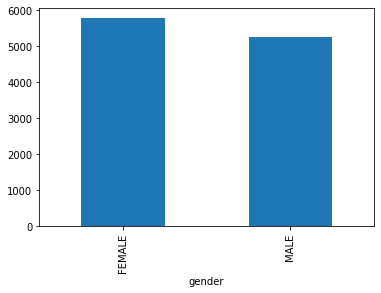

In [9]:
by_gender = df1.groupby('gender')
by_gender.size().plot(kind='bar')

In [10]:
by_gender.size()

gender
FEMALE    5770
MALE      5248
dtype: int64

<AxesSubplot:xlabel='Event,gender'>

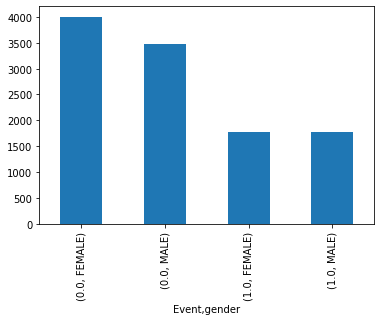

In [11]:
gender_sim = df1.groupby(['Event','gender'])
gender_sim.size().plot(kind = 'bar')

<AxesSubplot:xlabel='Event'>

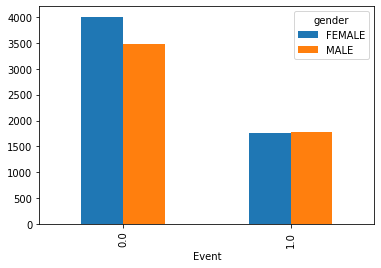

In [12]:
gender_sim.size().unstack().plot(kind = 'bar')

gender
FEMALE    AxesSubplot(0.125,0.125;0.775x0.755)
MALE      AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

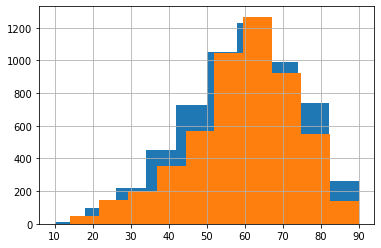

In [13]:
df1.groupby('gender').age.hist()

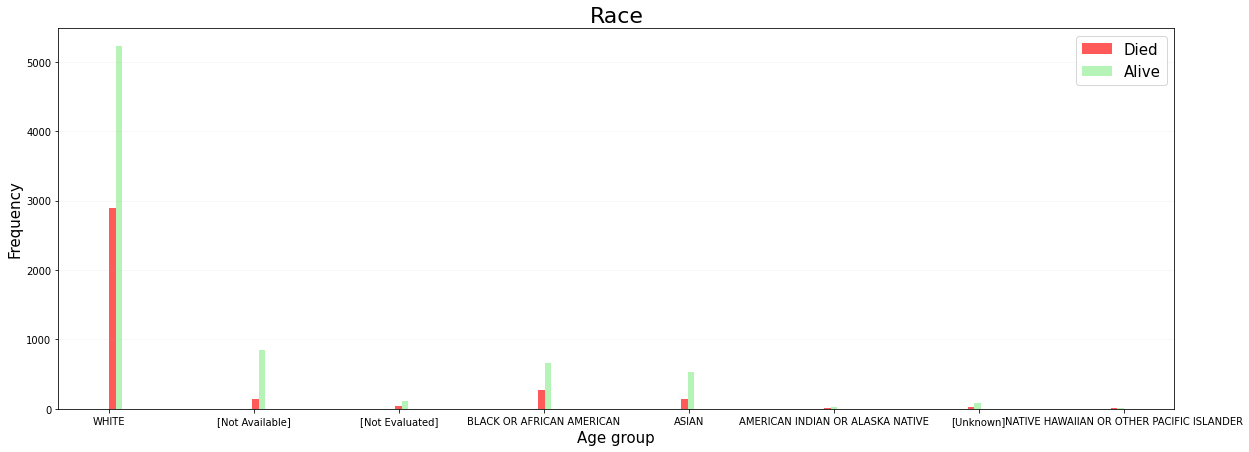

In [14]:
fig, ax = plt.subplots(figsize=(20,7))
age_died = df[df['Event']==1]['race']
age_survive = df[df['Event']==0]['race']
n, bins, patches = plt.hist(x = [age_died,age_survive] 
                            , bins='auto', 
                            color=['red','lightgreen'],
                            alpha=0.65, rwidth=1.0)
plt.grid(axis='y', alpha=0.1)
plt.xlabel('Age group', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Race', fontsize = 22)
plt.legend(['Died','Alive'], fontsize = 15);